## Assignment 4:

Clustering and PCA using a dataframe obtained from UCI machine learning. The data is related to breast cancer (Winscosin database), and contain feature informations for malignant and benign breast tumors.

### Dataset Atribute information:

0: 'diagnosis'
1:'radius_mean',
2:'texture_mean',
3:'perimeter_mean',
4:'area_mean',
5:'smoothness_mean',
6:'compactness_mean',
7:'concavity_mean',
8:'concave points_mean',
9:'symmetry_mean',
10:'fractal_dimension_mean',
11:'radius_se',
12:'texture_se',
13:'perimeter_se',
14:'area_se',
15:'smoothness_se',
16:'compactness_se',
17:'concavity_se',
18:'concave points_se',
19:'symmetry_se',
20:'fractal_dimension_se',
21:'radius_worst',
22:'texture_worst',
23:'perimeter_worst',
24:'area_worst',
25:'smoothness_worst',
26:'compactness_worst',
27:'concavity_worst',
28:'concave points_worst',
29:'symmetry_worst',
30:'fractal_dimension_worst'

In [1]:
import pandas as pd
import numpy as np

##creating a dataframe using a csv file obtained from Kaggle.
df = pd.read_csv ('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
df = df.drop (0, axis = 1) ## to see the dataframe

# Adjusting variable name
df = df.rename ({1:'diagnosis',2:'radius_mean',3:'texture_mean',4:'perimeter_mean',5:'area_mean',
                 6:'smoothness_mean',7:'compactness_mean',8:'concavity_mean',9:'concave points_mean',
                 10:'symmetry_mean',11:'fractal_dimension_mean',12:'radius_se',13:'texture_se',14:'perimeter_se',
                 15:'area_se',16:'smoothness_se',17:'compactness_se',18:'concavity_se',19:'concave points_se',
                 20:'symmetry_se',21:'fractal_dimension_se',22:'radius_worst',23:'texture_worst',24:'perimeter_worst',
                 25:'area_worst',26:'smoothness_worst',27:'compactness_worst',28:'concavity_worst',
                 29:'concave points_worst',30:'symmetry_worst',31:'fractal_dimension_worst'}, axis = 1) 

df ## seeing the dataframe. The original dataframe contains 569 observations and 31 variables.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## PART1
**DATA EXPLORATION, VISUALIZATION, AND CLEANING**

In [2]:
#1 - variable types, to ensure variables types are correct;
df.dtypes # to see variables types. 

#In this case, only diagnosis is a categorical variable. Diagnosis is the target (y) variable 
#All other variables are numeric (float). These variable are the predictors (X). 
#No convertion of categorical variables were needed in this case.'''

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [3]:
#2 - removing outliers

df_x = df.drop ('diagnosis', axis = 1)

from scipy import stats
df_x = df_x[(np.abs(stats.zscore(df_x)) < 3).all(axis=1)]

#4 - removing missing values
df_x = df_x.dropna()

#MERGING DATASETS

df_final = pd.merge (df_x, df, how = 'inner')

# new dataframe shape
df = df_final
df.shape #The dataframe has now 495 lines (observations) and 31 columns (variables)

(495, 31)

In [4]:
#3 - Seeing the proportions between benign and malignant cancers after data cleaning
#This is un unbalanced dataset, much more observations are benign (67%), 
#while only (32%) are malignant.

df.diagnosis.value_counts(normalize = True)

B    0.670707
M    0.329293
Name: diagnosis, dtype: float64

In [5]:
#4 - Analyze general data;

gen_desc = df.describe().T
gen_desc = gen_desc.drop ('count', axis = 1)
gen_desc.rename (columns = {'50%':'Median',
                           'mean':'Mean',
                           'std':'Standard Deviation',
                           'min':'Minimum',
                           '25%':'Quantile 25',
                           '75%':'Quantile 75',
                           'max':'Maximum'}, inplace = True)

gen_desc['Range'] =  gen_desc['Maximum'] - gen_desc['Minimum']

gen_desc = np.round(gen_desc, decimals=3) ## round to better visualization
gen_desc.head(10)

,Mean,Standard Deviation,Minimum,Quantile 25,Median,Quantile 75,Maximum,Range
radius_mean,13.869,3.043,6.981,11.745,13.210,15.290,23.270,16.289
texture_mean,18.890,3.966,9.710,16.000,18.580,21.460,30.720,21.010
perimeter_mean,89.932,20.795,43.790,75.475,85.630,100.250,152.100,108.310
area_mean,622.613,286.903,143.500,424.800,538.900,718.050,1686.000,1542.500
smoothness_mean,0.095,0.013,0.063,0.085,0.095,0.104,0.137,0.075
compactness_mean,0.095,0.041,0.019,0.062,0.085,0.120,0.228,0.209
concavity_mean,0.074,0.062,0.000,0.027,0.053,0.107,0.317,0.317
concave points_mean,0.043,0.033,0.000,0.019,0.031,0.063,0.156,0.156
symmetry_mean,0.178,0.023,0.117,0.161,0.177,0.193,0.254,0.137
fractal_dimension_mean,0.062,0.006,0.050,0.057,0.061,0.065,0.080,0.030


In [6]:
#5 - Analyze data grouped by diagnosis;

by_type = df.groupby('diagnosis')
np.round(by_type.agg(['min', 'mean', 'max']).T, decimals = 3).head(20)

diagnosis                    B         M
radius_mean      min     6.981    10.950
                 mean   12.290    17.085
                 max    17.850    23.270
texture_mean     min     9.710    11.890
                 mean   17.760    21.192
                 max    30.720    29.810
perimeter_mean   min    43.790    71.900
                 mean   78.953   112.294
                 max   114.600   152.100
area_mean        min   143.500   371.100
                 mean  472.864   927.624
                 max   992.100  1686.000
smoothness_mean  min     0.063     0.074
                 mean    0.092     0.101
                 max     0.137     0.134
compactness_mean min     0.019     0.046
                 mean    0.077     0.130
                 max     0.184     0.228
concavity_mean   min     0.000     0.024
                 mean    0.042     0.140

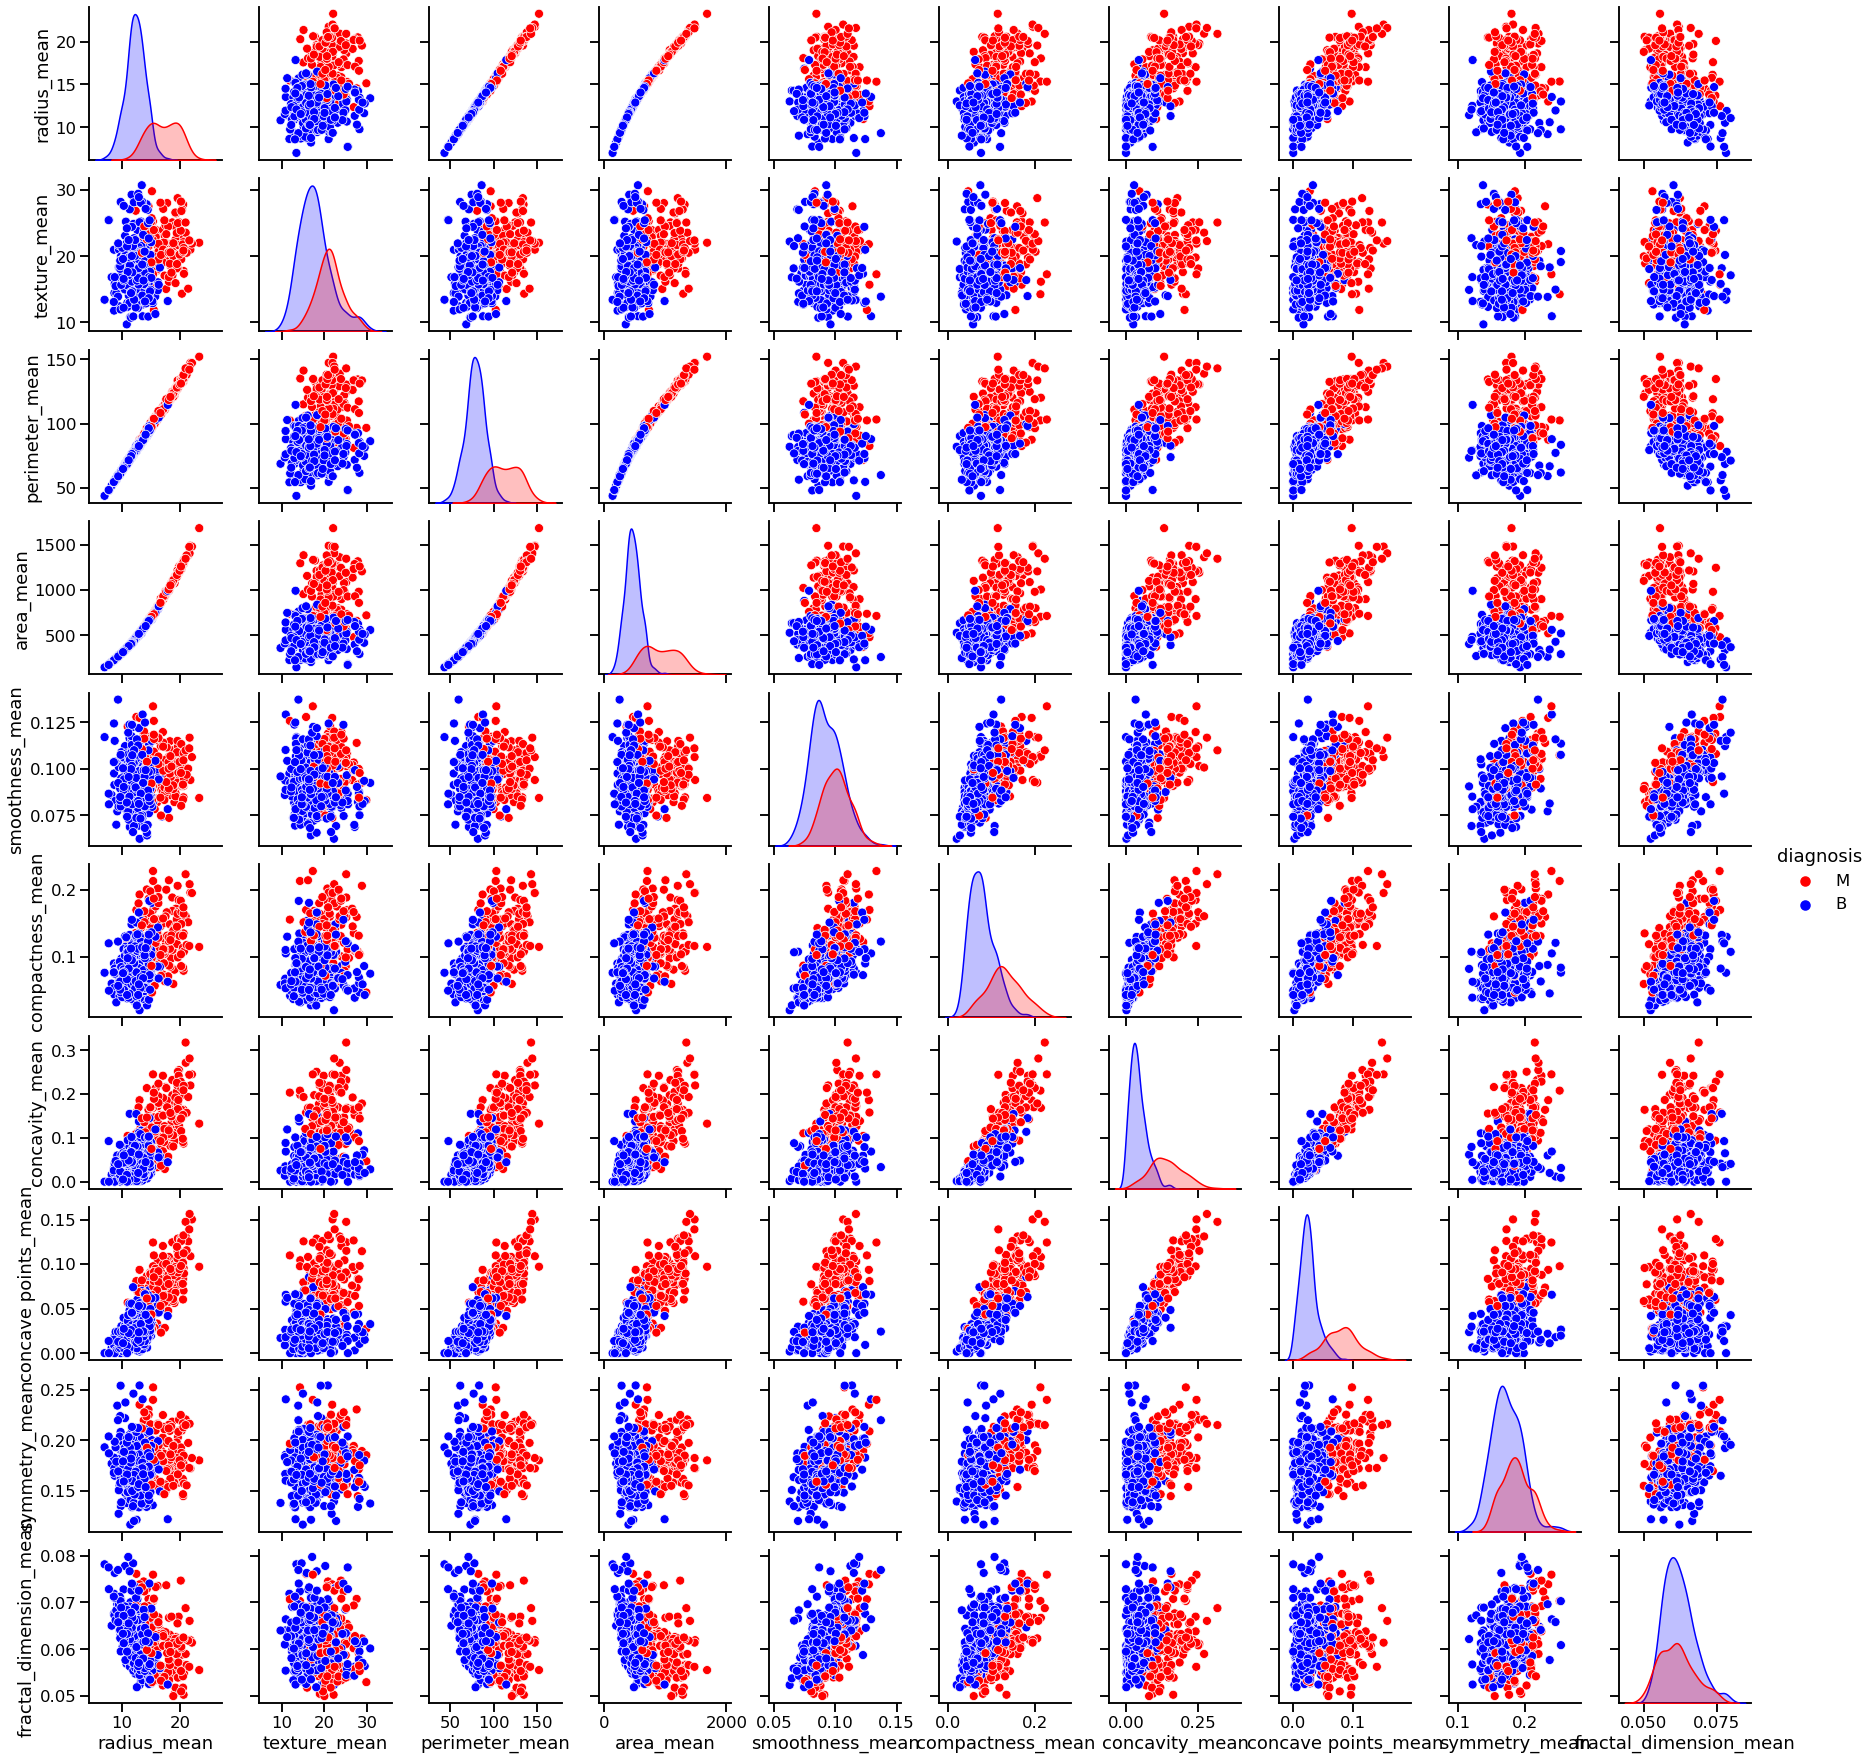

In [7]:
#6- Creating pairplots

#Importing needed modules
import seaborn as sns

sns.set_context('notebook')
sns.set_context('talk')

#Pairplot to understand feature distribution (histograms), feature space (scatterplot) and possible correlations (scatterplot)
# The feature values were also grouped and colored by diagnosis

x = df.columns [df.columns.str.endswith('mean')].to_list()
x.append('diagnosis')

sns.pairplot(df [x], hue='diagnosis',hue_order=['M', 'B'], palette = {'M':'red', 'B':'blue'}) 
#The variables distribution are near the Gaussian distribution. No transformation is needed.

<AxesSubplot:>

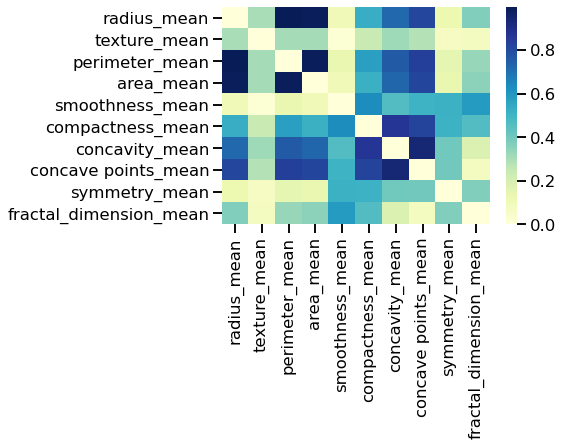

In [8]:
#7- Seeing the correlation between numeric variables

# Creating a correlation matrix
correlation_matrix = df [df.columns [df.columns.str.endswith('mean')]].corr()

# Removing the diagonals for better comparison
correlation_matrix = correlation_matrix.replace(1, 0)

#Seeing the absolute correlation matrix in heatmap
sns.heatmap(correlation_matrix.abs(), cmap="YlGnBu")

#Some variables are very high correlated, which falls into the multicolinearity issue. 

In [9]:
#8- Identifying the most correlated variables in the dataset

float_columns = [x for x in df.columns if x not in ['diagnosis']]
correlation_matrix = df [float_columns].corr()

# Removing the diagonals for better comparison
for x in range(len(float_columns)):
    correlation_matrix.iloc[x,x] = 0.0
    
#Seeing the top 10 most correlated features
corr_df = correlation_matrix.abs().stack().reset_index().rename ({'level_0':'variable_1',
                                                        'level_1':'variable_2',
                                                        0:'abs_correlation'}, axis = 1)

sorted_df = corr_df.sort_values(by='abs_correlation', ascending = False)

sorted_df = sorted_df.drop_duplicates(subset='abs_correlation', keep='first', inplace=False)

sorted_df.reset_index(drop = True).head(10) #Seeing the dataframe

#Some variables are very high correlated, which falls into the multicolinearity issue. 

,variable_1,variable_2,abs_correlation
0,radius_mean,perimeter_mean,0.998347
1,perimeter_worst,radius_worst,0.994003
2,radius_mean,area_mean,0.992124
3,perimeter_mean,area_mean,0.990969
4,area_worst,radius_worst,0.990649
5,perimeter_worst,area_worst,0.984433
6,radius_worst,perimeter_mean,0.974861
7,perimeter_mean,perimeter_worst,0.973101
8,radius_mean,radius_worst,0.972976
9,radius_worst,area_mean,0.972647


In [10]:
#9- Scaling the data

#Importing modules
from sklearn.preprocessing import StandardScaler

#Scaling the data for numeric values
scaler = StandardScaler()
df[float_columns] = scaler.fit_transform(df[float_columns])

# Seeing the first 5 lines of the dataset to ensure the scaling occurred properly.
df.head(5) 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,2.204465,-0.282612,2.068351,2.454131,-0.806833,-0.392414,0.206957,0.826142,0.154835,-0.922288,...,-0.307819,1.938870,2.509421,-0.333961,-0.355468,0.004135,1.365129,-0.177083,0.524615,M
1,1.914972,0.595678,1.928754,2.024982,1.134031,1.588118,1.999878,2.601498,1.260931,-0.323008,...,0.066720,1.716129,1.963460,0.644786,1.540072,1.226375,2.345448,1.561970,0.424590,M
2,2.112354,-1.148284,2.174252,2.352950,0.407963,0.927616,2.009614,1.875733,0.141923,-0.532395,...,-1.498573,1.705522,1.667270,0.312202,-0.208860,0.931351,0.960963,-0.954921,-0.325600,M
3,-0.466770,-0.805044,-0.354381,-0.507699,2.554936,1.834284,1.357347,1.155812,1.338400,2.590363,...,-0.247752,-0.019839,-0.174851,2.293453,2.340040,1.724519,1.160466,2.311596,2.982183,M
4,1.441255,0.275153,1.428130,1.456271,-0.034703,0.347544,0.625576,0.943925,0.077365,-0.786909,...,0.443027,1.740878,1.735792,0.635284,0.210246,0.804913,1.488959,0.453651,0.153688,M


In [11]:
#10- Droping the diagnosis column for further clustering and PCA analyses:
y = pd.DataFrame (df['diagnosis'])
y['diagnosis'] = y['diagnosis'].map (lambda x: 1 if x== 'M' else 0)

X = df.drop('diagnosis', axis = 1)

## Key EDA findings, data cleaning and preprocessing summary

   1 - The scatter plot results shown in the pairplot (45º degree tendency) and the Pearson correlation values (approaching to 1 or -1) indicates that the numeric variables are highly correlated, which can lead to a multicolinearity issue. 
   
   2 - The histograms (shown in the pairplot) also suggest that the feature values are nearly normal distributed, in such a way that no data transformation is needed.
  
   3 - The scatter plots and histograms shown in the pairplot, as well as the descriptive statistics (min, mean, max) suggest that the feature space in most features are relatively separed for malignant and benign groups, i.e. there is a small intersection between them. It suggest that two clusters could be formed for this dataset: possibly one cluster including the malignant tumors and other containing the benign ones.
   
   4- Outliers and missing values (NA) were removed from the dataset. The data was standard scaled to provide equivalent distances in such a way that clustering algorithms can calculate distances correctly.

## Main Objectives

The main objetives of this work are:

1- Perform a principal component analysis (PCA) in order to remove multicolinearity observed between the variables in the dataset. Verify whether the data dimensionality reduction performed using PCA favors clustering or not. This approach can reduce curse of dimensionality.

2- Identify the best clustering method to fit the data considering the labels already known for tumor diagnosis: Benign or Malignant.

## PART2

### 1- PCA

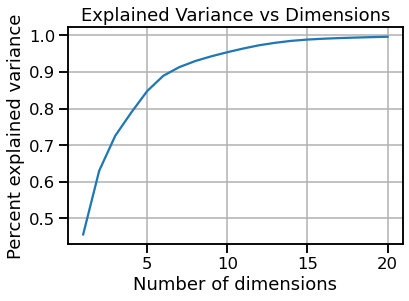

In [12]:
#1- Creating a function to measure the transformation error due to PCA transformation

from sklearn.metrics import mean_squared_error

def pca_error(model, X):

    try:
        X_val = X.values
    
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = model.fit(X_val).transform(X_val)
    data_inv = model.inverse_transform(data_inv)
    
    # root mean-squared-error calculation
    rmse = mean_squared_error(data_inv.ravel(), X_val.ravel())**(0.5)
    
    # Adding a negative sign to indicate that lesser the error, better the prediction in grid search
    return -1.0 * rmse

#2- PCA

from sklearn.decomposition import PCA

#Seeing the explained variance in Principal Components
variance_accumulated = []

n_list = range (1,21)

for n in n_list:
    PCA_model = PCA(n_components = n)
    PCA_model = PCA_model.fit(X)
    variance_accumulated.append (PCA_model.explained_variance_ratio_.sum())

#Plotting the graph
sns.set_context('talk')

import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot(n_list, variance_accumulated)
ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

ax.grid(True)

### 10 dimensions explain 0.96% of total variance, then it was selected to underwent further analyses.

In [13]:
# 3- Calculate the feature importances stored into the first 10 principal components

PCA_model = PCA(n_components = 10)
PCA_model = PCA_model.fit(X)


abs_feature_values = np.abs(PCA_model.components_).sum(axis=0)
feature_importance = pd.DataFrame({'n':10, 
                     'features': X.columns,
                     'values':abs_feature_values/abs_feature_values.sum()})

#Seeing the 10 most important features to PCA
feature_importance.sort_values (by='values', ascending = False).reset_index (drop = True).head(5)

,n,features,values
0,10,symmetry_se,0.059544
1,10,symmetry_mean,0.056631
2,10,smoothness_se,0.054465
3,10,smoothness_mean,0.049073
4,10,fractal_dimension_se,0.044201


In [14]:
#4- Fitting transform PCA

columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
PCA_df = pd.DataFrame (PCA_model.fit_transform(X), columns = columns)
PCA_df #Seeing the PCA dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.930730,-4.125995,-0.686830,1.173356,-0.096268,-0.193431,1.028286,-0.664127,-0.952600,1.287235
1,7.979621,-0.525835,-0.224090,1.239343,-0.625382,0.885213,-0.252213,-0.140889,-0.106451,-0.129597
2,6.038510,-1.668643,1.461943,3.723421,0.512328,-1.503476,-0.295497,-1.112642,0.034719,1.191901
3,3.380465,5.527214,-3.291519,0.307324,-0.967770,0.033787,0.467702,0.071621,-0.236396,-0.669370
4,3.587426,-2.858644,-1.716780,-0.204028,-0.768483,-0.259219,0.086420,-0.281169,-0.202434,0.178225
...,...,...,...,...,...,...,...,...,...,...
490,0.199028,0.330640,1.948261,-1.849157,0.660329,-1.040392,0.164371,0.126103,-1.000380,-0.424089
491,12.001785,0.475099,1.753866,1.137460,0.791249,-0.162524,0.528799,1.018831,0.650759,-0.491916
492,9.334772,-3.469284,3.530168,2.267797,-0.455483,-3.007395,0.312049,-0.010523,1.300853,0.316393
493,5.723824,-3.735313,3.621982,-1.913455,-1.033071,-0.438761,-0.330745,1.018637,-0.607991,-0.188120


### 2- Clustering

**The following clustering methods were used: 
    1) Kmeans; 
    2) Agglomerative Clustering Ward; 
    3) Agglomerative Clustering average; 
    4) Agglomerative Clustering Single; 
    5) Agglomerative Clustering Complete**
    
**Clustering results using the PCA transformed and raw datasets are shown below.**

### With PCA

In [23]:
accuracy_list = []

#-5 Kmeans clustering#############################################################

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(PCA_df)

y['kmeans'] = kmeans.predict(PCA_df)

#Assessing Kmeans clustering accuracy
from sklearn.metrics import balanced_accuracy_score, average_precision_score, recall_score

accuracy_list.append (('Kmeans',
                       balanced_accuracy_score (y['diagnosis'], y['kmeans']),
                       average_precision_score (y['diagnosis'], y['kmeans']),
                       recall_score (y['diagnosis'], y['kmeans'])))



#6- Agglomerative Clustering Ward    ########################################################

from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
agg_cluster = agg_cluster.fit(PCA_df)
y['agg_ward'] = agg_cluster.fit_predict(PCA_df)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_ward',
                       balanced_accuracy_score (y['diagnosis'], y['agg_ward']),
                       average_precision_score (y['diagnosis'], y['agg_ward']),
                       recall_score (y['diagnosis'], y['agg_ward'])))




#7- Agglomerative Clustering Average Distance ################################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='average', compute_full_tree=True)
agg_cluster = agg_cluster.fit(PCA_df)
y['agg_average'] = agg_cluster.fit_predict(PCA_df)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_average',
                       balanced_accuracy_score (y['diagnosis'], y['agg_average']),
                       average_precision_score (y['diagnosis'], y['agg_average']),
                       recall_score (y['diagnosis'], y['agg_average'])))



#8- Agglomerative Clustering Average Distance ###############################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True)
agg_cluster = agg_cluster.fit(PCA_df)
y['agg_single'] = agg_cluster.fit_predict(PCA_df)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_single',
                       balanced_accuracy_score (y['diagnosis'], y['agg_single']),
                       average_precision_score (y['diagnosis'], y['agg_single']),
                       recall_score (y['diagnosis'], y['agg_single'])))



#9- Agglomerative Clustering Average Distance ################################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
agg_cluster = agg_cluster.fit(PCA_df)
y['agg_complete'] = agg_cluster.fit_predict(PCA_df)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_complete',
                       balanced_accuracy_score (y['diagnosis'], y['agg_complete']),
                       average_precision_score (y['diagnosis'], y['agg_complete']),
                       recall_score (y['diagnosis'], y['agg_complete'])))


#Seeing the accuracy list for each clustering method
pd.DataFrame (accuracy_list, columns = ['Clustering Method', 'Balanced Accuracy', 'Average Precision', 'Recall']).sort_values (by = 'Balanced Accuracy', ascending = False).reset_index (drop=True)

,Clustering Method,Balanced Accuracy,Average Precision,Recall
0,Kmeans,0.891354,0.820752,0.809816
1,Agg_complete,0.751534,0.666704,0.503067
2,Agg_average,0.533742,0.374555,0.067485
3,Agg_single,0.503067,0.333408,0.006135
4,Agg_ward,0.097938,0.286392,0.171779


<AxesSubplot:>

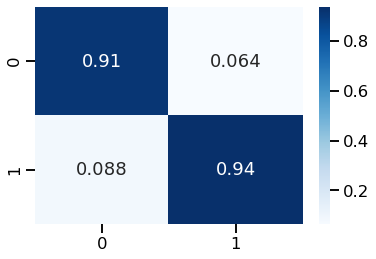

In [31]:
#Seeing the normalized confusion matrix for the best model according to accuracy measure (Kmeans with PCA)

from sklearn.metrics import confusion_matrix

sns.heatmap (confusion_matrix (y['diagnosis'], y['kmeans'], normalize = 'pred'), cmap=plt.cm.Blues, annot=True)

### Without PCA

In [27]:
accuracy_list = []

#-5 Kmeans clustering#############################################################

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(X)

y['kmeans'] = kmeans.predict(X)

#Assessing Kmeans clustering accuracy
from sklearn.metrics import balanced_accuracy_score, average_precision_score, recall_score

accuracy_list.append (('Kmeans',
                       balanced_accuracy_score (y['diagnosis'], y['kmeans']),
                       average_precision_score (y['diagnosis'], y['kmeans']),
                       recall_score (y['diagnosis'], y['kmeans'])))



#6- Agglomerative Clustering Ward    ########################################################

from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
agg_cluster = agg_cluster.fit(X)
y['agg_ward'] = agg_cluster.fit_predict(X)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_ward',
                       balanced_accuracy_score (y['diagnosis'], y['agg_ward']),
                       average_precision_score (y['diagnosis'], y['agg_ward']),
                       recall_score (y['diagnosis'], y['agg_ward'])))




#7- Agglomerative Clustering Average Distance ################################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='average', compute_full_tree=True)
agg_cluster = agg_cluster.fit(X)
y['agg_average'] = agg_cluster.fit_predict(X)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_average',
                       balanced_accuracy_score (y['diagnosis'], y['agg_average']),
                       average_precision_score (y['diagnosis'], y['agg_average']),
                       recall_score (y['diagnosis'], y['agg_average'])))



#8- Agglomerative Clustering Average Distance ###############################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True)
agg_cluster = agg_cluster.fit(X)
y['agg_single'] = agg_cluster.fit_predict(X)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_single',
                       balanced_accuracy_score (y['diagnosis'], y['agg_single']),
                       average_precision_score (y['diagnosis'], y['agg_single']),
                       recall_score (y['diagnosis'], y['agg_single'])))



#9- Agglomerative Clustering Average Distance ################################################

agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
agg_cluster = agg_cluster.fit(X)
y['agg_complete'] = agg_cluster.fit_predict(X)

#Assessing accuracy of agglomerative clustering
accuracy_list.append (('Agg_complete',
                       balanced_accuracy_score (y['diagnosis'], y['agg_complete']),
                       average_precision_score (y['diagnosis'], y['agg_complete']),
                       recall_score (y['diagnosis'], y['agg_complete'])))


#Seeing the accuracy list for each clustering method
pd.DataFrame (accuracy_list, columns = ['Clustering Method', 'Balanced Accuracy', 'Average Precision', 'Recall']).sort_values (by = 'Balanced Accuracy', ascending = False).reset_index (drop=True)

,Clustering Method,Balanced Accuracy,Average Precision,Recall
0,Kmeans,0.891354,0.820752,0.809816
1,Agg_ward,0.779141,0.703737,0.558282
2,Agg_complete,0.730061,0.637900,0.460123
3,Agg_average,0.503067,0.333408,0.006135
4,Agg_single,0.503067,0.333408,0.006135


<AxesSubplot:>

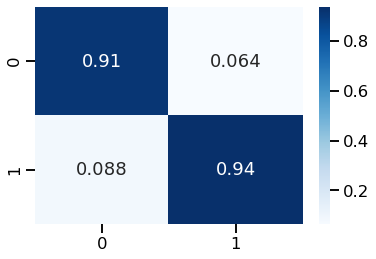

In [32]:
#Seeing the normalized confusion matrix and scores for the best model according to accuracy measure (Kmeans with PCA)

sns.heatmap (confusion_matrix (y['diagnosis'], y['kmeans'], normalize = 'pred'), cmap=plt.cm.Blues, annot=True)

## PART 3

### A) Best Model



According to the balanced accuracy, average precision, and recall calculated from the different clustering methods, the best model was Kmeans, given that it presented the highest score values, which indicates that the two clusters calculated by Kmeans correctly classified most of the malignant and benign observations. PCA does not affect the Kmeans model accuracy and score metrics.

### B) Main Findings 

1- PCA was able to reduce the dataset dimensionality from 30 variables to 10 variables, preserving a significant amount of variance (96%), in addition to addressing the multicolinearity issues (by algorithm definition), which can have a positive impact in the performance of supervised machine learning algorithms;

2- The best clustering method to group malignant and benign tumors within the Winscosin Dataset was Kmeans, given that it presented the highest values of balanced accuracy, average precision, and recall. The Kmeans model also presented elevated values of balanced accuracy, average precision, and recall (above 80%), which suggest that this model can accurately group benign or benign observations. The confusion matrix provided further confirms this tendency.

3- Despite of reducing 20 dimensions from the original dataset, PCA does not affect the clustering accuracy, which is important to avoid curse of dimensionality. However PCA slighly reduces the score metrics evaluated for the agglomeration clustering models.

4- The transformed PCA dataset can be used as a basis for future supervised machine learning algorithms, particularly considering that this model addressed the multicolinearity issues (by algorithm definition), in addition to reduces 20 dimensions of the dataset, which is important to avoid curse of dimensionality. Thus, it can benefit predictive models.

### C) Model's limitation and perspectives 

**Limitations:**

1- Despite being a very good model given the metrics analyzed, the clustered model does not perfectly fit on the original dataset categories (labels). The model fails on grouping 11% of the dataset observations.

2- Another weakness of the model was the low number of samples included. The initial dataset was relatively short, with 569 rows. This number decreases after all data processing. Only 495 samples were included in the final model given that NA values and outliers were removed.

3- Moreover, the model was constructed under an unbalanced dataset, which may affect its accuracy.

**Perspectives:**

1- Then a possible strategy to improve the model should be increasing the number of initial samples, or even upscaling the malignant class using methods such as bagging.

2- Other possible strategy should be using a kernel PCA instead of a linear PCA, which could preserve more variance, especially if the variables were not linearly related. 

3- A grid search with different distance affinities for the agglomerative clustering may also provide better results than the default euclidean.